In [14]:
import json
import pandas as pd
import colorsys
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [15]:
def rgb(color_string):
    values = color_string[4:-1].split(",")
    r = int(values[0])
    g = int(values[1])
    b = int(values[2])
    return r, g, b

In [16]:
def rgb_string(r, g, b):
    return 'rgb(' + repr(r) + ',' + repr(g) + ',' + repr(b) + ')'

In [17]:
def merge_colors(c1, c2):
    r1, g1, b1 = rgb(c1)
    r2, g2, b2 = rgb(c2)
    
    r = int((r1+r2)/2)
    g = int((g1+g2)/2)
    b = int((b1+b2)/2)
    return r, g, b

In [18]:
def compute_palette(s=0.9, v=1.0, n=3, shift=0.0, plot=True):
    index_to_color = {}
    for i in range(n):
        h = (i * (1.0 / n) + shift) % 1.0
        color = colorsys.hsv_to_rgb(h, s, v)
        index_to_color.update({i: rgb_string(int(color[0] * 255), int(color[1] * 255), int(color[2] * 255))})

    if plot:
        palette = np.zeros((1, n, 3), dtype=np.uint8)
        for i in range(0, n):
            string = index_to_color[i]
            r, g, b = rgb(string)
            palette[0, i] = np.array([r, g, b])

        io.imshow(palette)
        plt.axis('off')
        plt.show()
        
    return index_to_color

In [19]:
# Todo: find good names

topic_names = ["Symptoms", 
               "Diagnostic", 
               "Genetic", 
               "Animals", 
               "Contamination between people", 
               "Cell biology", 
               "Contamination medium", 
               "Epidemiology"]

subtopic_names = [["subtopic 0.0",
                   "subtopic 0.1",
                   "subtopic 0.2",
                   "subtopic 0.3",
                   "subtopic 0.4",
                   "subtopic 0.5",
                   "subtopic 0.6",
                   "subtopic 0.7"],
                  
                  ["subtopic 1.0",
                  "subtopic 1.1",
                  "subtopic 1.2",
                  "subtopic 1.3",
                  "subtopic 1.4",
                  "subtopic 1.5",
                  "subtopic 1.6",
                  "subtopic 1.7",],
                  
                  ["subtopic 2.0",
                   "subtopic 2.1",
                   "subtopic 2.2",
                   "subtopic 2.3",
                   "subtopic 2.4",
                   "subtopic 2.5",
                   "subtopic 2.6",
                   "subtopic 2.7"],
                  
                  ["subtopic 3.0",
                  "subtopic 3.1",
                  "subtopic 3.2",
                  "subtopic 3.3",
                  "subtopic 3.4",
                  "subtopic 3.5",
                  "subtopic 3.6",
                  "subtopic 3.7",],
                  
                  ["subtopic 4.0",
                   "subtopic 4.1",
                   "subtopic 4.2",
                   "subtopic 4.3",
                   "subtopic 4.4",
                   "subtopic 4.5",
                   "subtopic 4.6",
                   "subtopic 4.7"],
                  
                  ["subtopic 5.0",
                  "subtopic 5.1",
                  "subtopic 5.2",
                  "subtopic 5.3",
                  "subtopic 5.4",
                  "subtopic 5.5",
                  "subtopic 5.6",
                  "subtopic 5.7",],
                  
                  ["subtopic 6.0",
                   "subtopic 6.1",
                   "subtopic 6.2",
                   "subtopic 6.3",
                   "subtopic 6.4",
                   "subtopic 6.5",
                   "subtopic 6.6",
                   "subtopic 6.7"],
                  
                  ["Studies of Ebola and other diseases",
                  "Government management and practical aspects",
                  "Origins of the epidemy",
                  "Spread statistics and simulations",
                  "Medias, polls about society and healthcare workers",
                  "Wuhan, travel restrictions",
                  "Virus hosts",
                  "State of Emergency",]]

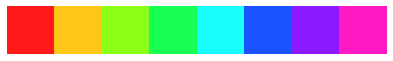

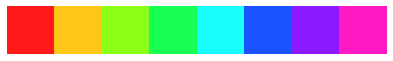

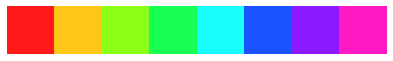

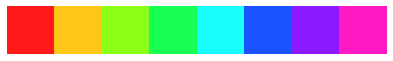

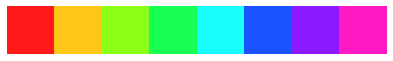

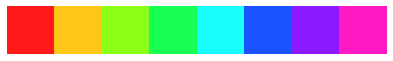

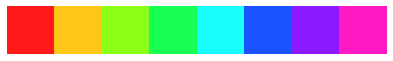

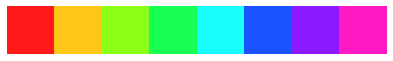

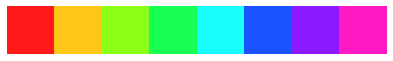

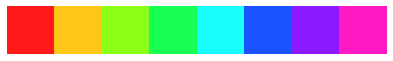

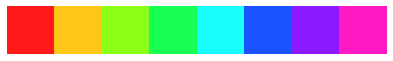

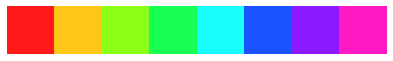

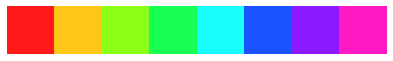

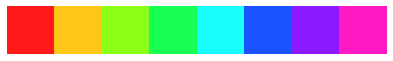

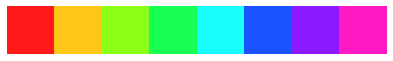

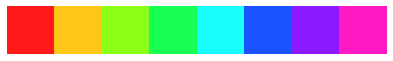

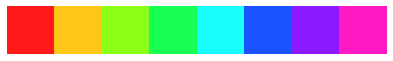

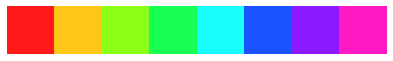

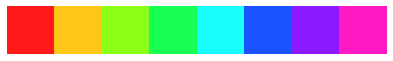

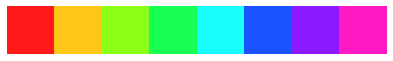

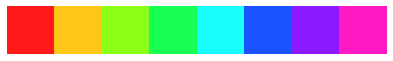

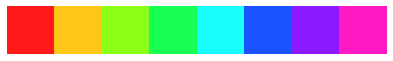

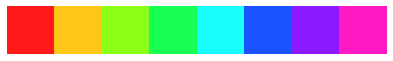

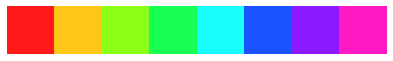

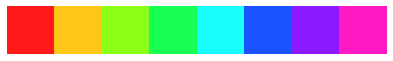

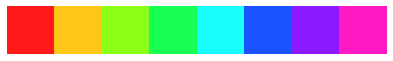

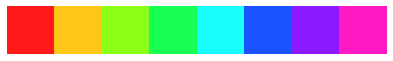

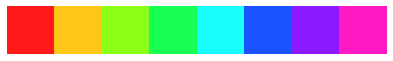

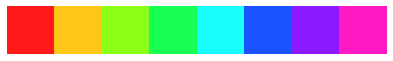

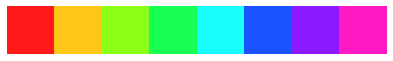

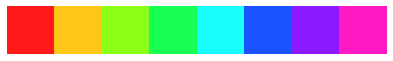

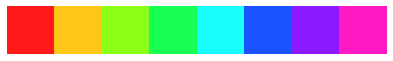

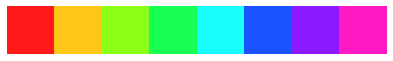

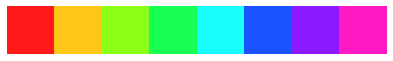

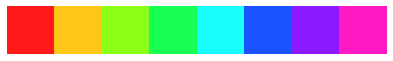

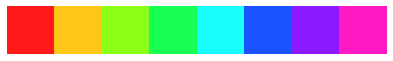

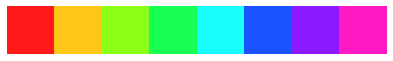

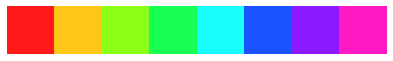

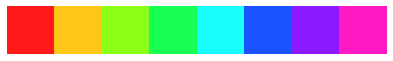

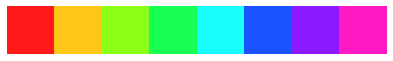

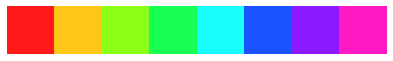

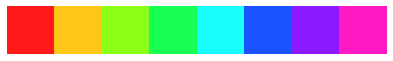

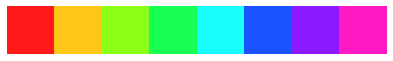

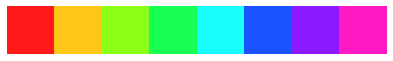

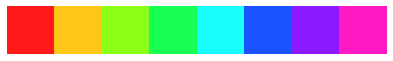

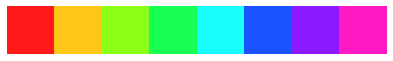

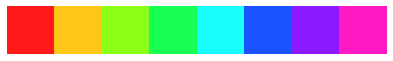

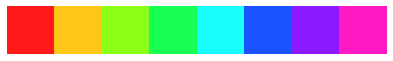

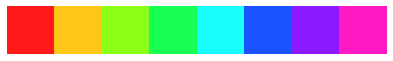

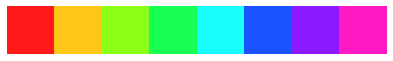

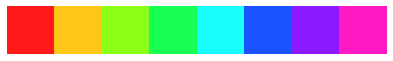

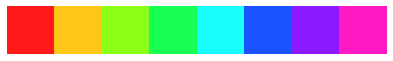

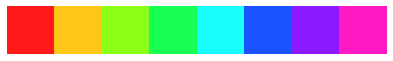

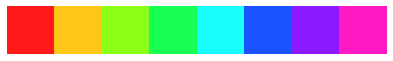

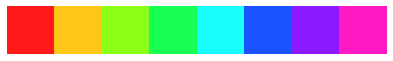

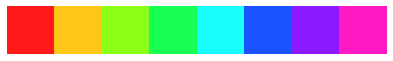

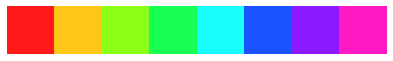

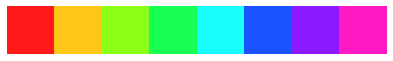

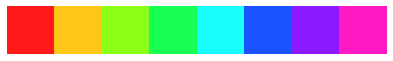

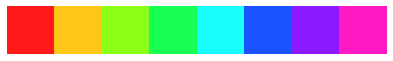

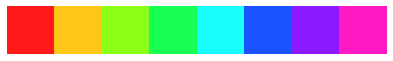

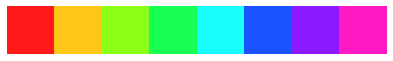

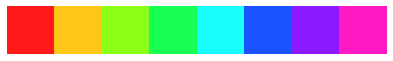

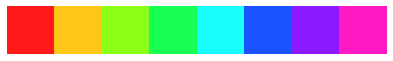

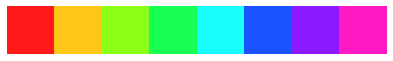

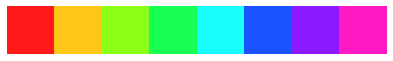

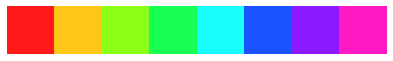

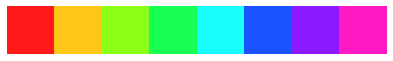

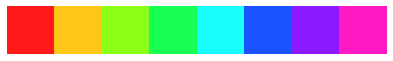

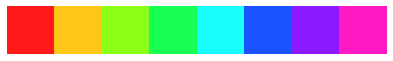

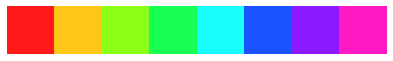

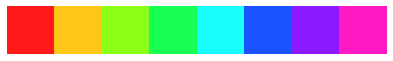

In [20]:
data = {}

n_topics = 8
n_subtopics = 8

for t in range(n_topics):
    index_to_color = compute_palette(n=n_topics, plot=True)
    data.update({"topic_" + repr(t): {"name": topic_names[t],
                                     "url": topic_names[t] + ".html",
                                     "color": index_to_color[t]}})
    for s in range(n_subtopics):
        index_to_color = compute_palette(n=n_topics, plot=True)
        data["topic_" + repr(t)].update({"subtopic_" + repr(s): {"name": subtopic_names[t][s],
                                                                "url": subtopic_names[t][s] + ".html",
                                                                "color": index_to_color[s]}})

JSON_PATH = 'data/json/main.json'
with open(JSON_PATH, 'w') as outfile:
    json.dump(data, outfile)

The end.